In [20]:
%load_ext autoreload
%autoreload 2

import numpy as np
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

## Ajout du chemin source
import os
import sys
NumAppPath = os.path.abspath('../../NumApp')
sys.path.append(NumAppPath)

from numApp import getDistanceMatrix,getFeaturesList
from ImageProcessing.processing import cropToCoin

## Paramètres 
plt.rcParams["figure.figsize"] = (15,10)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import MeanShift, estimate_bandwidth


def transformDist(D:np.ndarray)->np.ndarray:
    D = np.nan_to_num(D)
    D = D + D.T
    np.fill_diagonal(D,np.min(D))
    D = D + np.abs(np.min(D))
    return D


def getClusterIdx(C:np.ndarray)->list:
    nbCluster = len(set(C)) - (1 if -1 in C else 0)
    Clusters = []
    for i in range(nbCluster):
        Cli = np.argwhere(C==i).ravel()
        Clusters.append(Cli)  
    return [nbCluster,Clusters]


def getNbLiaison(Clusters):
    somme = 0
    for clst in Clusters:
        n,=np.shape(clst)
        somme = somme + int(n*(n-1)/2.0)
    return somme

def miseEnFormeHist(Draw):
    Dhist = np.sort(DRaw.ravel())
    Dhist = Dhist[~np.isnan(Dhist)]
    Dhist = Dhist-np.min(Dhist)
    return Dhist


def getDistanceLimite(Dhist)->float:
    #Estimation de bandwith
    DataReshaped = Dhist.reshape(-1,1)
    bandwidth = estimate_bandwidth(DataReshaped, quantile=0.2,n_samples=1000)

    #MeanShift algo
    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    ms.fit(DataReshaped)
    labels = ms.labels_
    cluster_centers = ms.cluster_centers_
    
    clusterID = np.argmin(ms.cluster_centers_)
    maxDist = np.max(Dhist[np.argwhere(labels==clusterID)])

    return maxDist

def getClustMore2(Clusters:list)->int:
    ClstMore2 = []
    for clst in Clusters:
        n, = np.shape(clst)
        if n >= 2:
            ClstMore2.append(clst)
    return ClstMore2


def afficherCluster(Clusters,folderName:str,save=False):
    plt.rcParams["figure.figsize"] = (15,15)
    i = 0
    place = 0
    if save:
        ## Création du dossier
        baseDir = os.getcwd()
        folderPath = os.path.join(baseDir,folderName)
        os.mkdir(folderPath)
    
    for clst in Clusters:
        plt.show()
        plt.figure(facecolor='white')
        place = 0
        print("############### CLUSTER %i ############"%(i+1))
        
        
        for j in range(len(clst)):
            idx = clst[j]
            plt.subplot(2,2,j+1,facecolor='white')
            plt.xticks([], [])
            plt.yticks([], [])
            img = cropToCoin(os.path.join(dataPath,dataList[idx]))
            plt.imshow(img)
            plt.title("%s"%(dataList[idx]),)
            if save:
                if j==4 or j == len(clst)-1 :
                    
                    currentCluster = "Cluster_%d.png"%(i+1)
                    currentClusterImagePath = os.path.join(folderPath,currentCluster)
                    plt.savefig(currentClusterImagePath)
                    plt.figure()
        i=i+1
    plt.rcParams["figure.figsize"] = (15,10)

# Paramètres

In [47]:
param = {
    ##### Algo Param
    "longeur RBF":6,
    "nombre features":200,
    "denoiseTV weight": 0.2,
    "alpha": 7,
    "reprojThreshold":4,
    
    
    ##### Config param
    "Features Folder":"Features19/",
    "Data Folder":"dataTest",
    "Multiprocess Pool":6,
}

#Si pas de calcul
dataMatrix = "DistMatrixTest.npy"

dataPath = os.path.join(NumAppPath,param["Data Folder"])
dataList = sorted(os.listdir(dataPath))


# Calcul de la matrice de distance

In [48]:
#D = getDistanceMatrix(param)
#np.save("DistMatrix19_2",D)

# Clustering

In [49]:
#Chargement
DRaw = np.load(dataMatrix)
Dhist = miseEnFormeHist(DRaw)
#Calcul de la distance limite
distLimite = getDistanceLimite(Dhist)
print(distLimite)

22.070354836867352


In [50]:
#Mise en forme de la matrice de distance 
D = transformDist(DRaw)
#Clustering
C = AgglomerativeClustering(n_clusters=None,affinity='precomputed',linkage = "average" ,distance_threshold=distLimite).fit_predict(D)

# Affichage des résultats

############### CLUSTER 1 ############


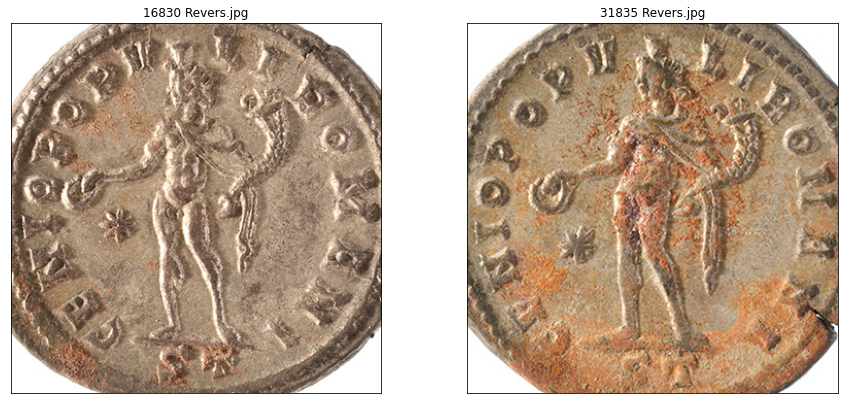

############### CLUSTER 2 ############


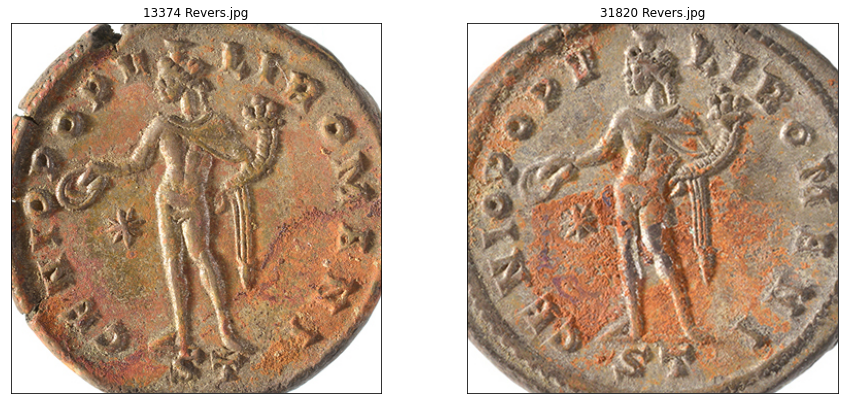

############### CLUSTER 3 ############


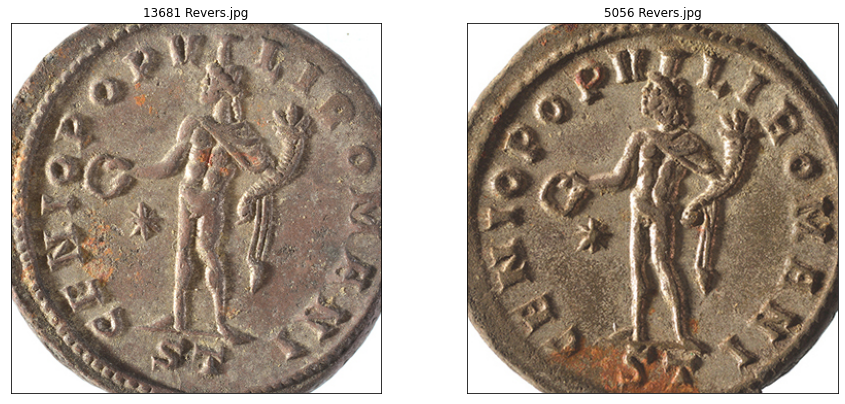

############### CLUSTER 4 ############


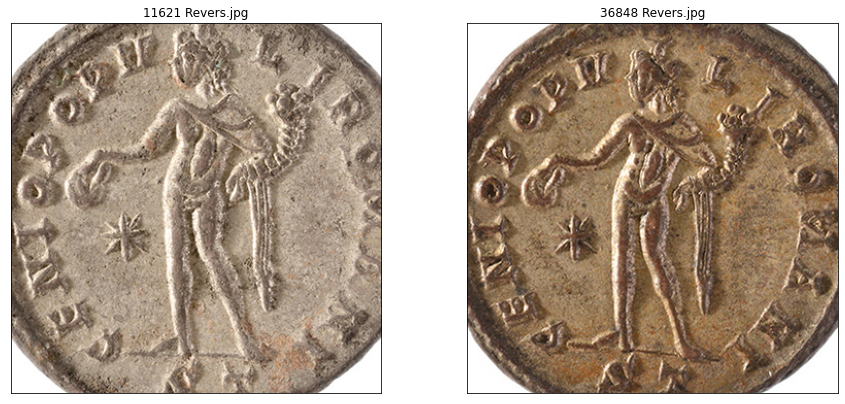

############### CLUSTER 5 ############


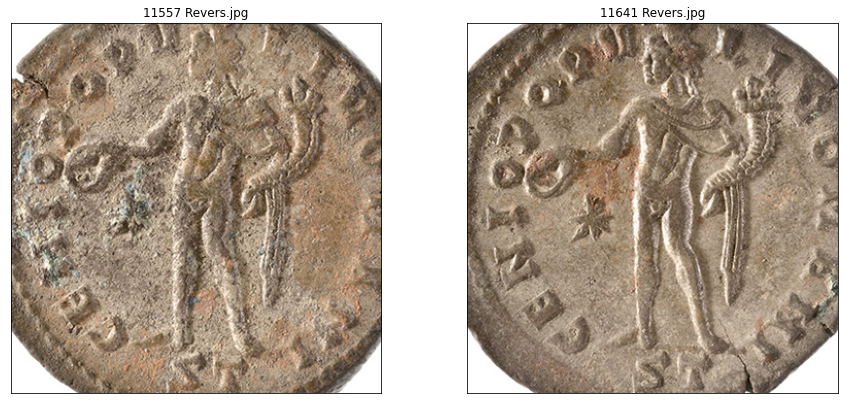

############### CLUSTER 6 ############


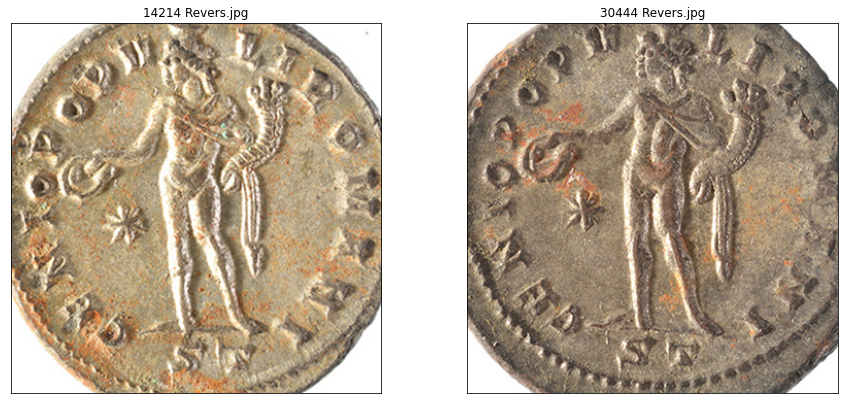

############### CLUSTER 7 ############


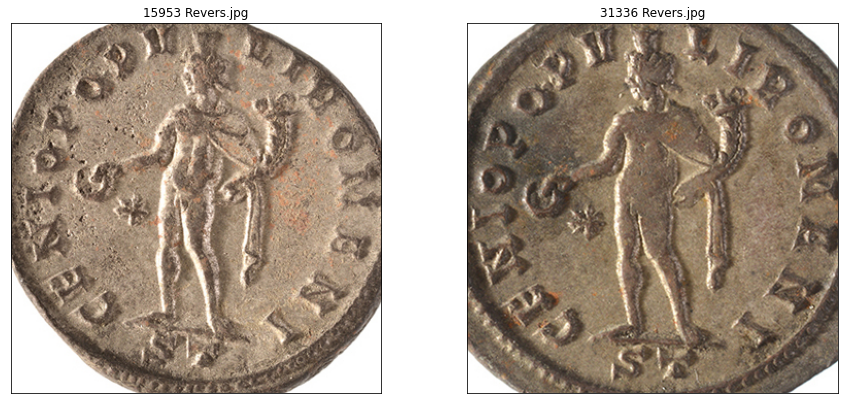

In [51]:
[nbCluster, Clusters] = getClusterIdx(C)

ClustMore2 = getClustMore2(Clusters)
## Affichage
afficherCluster(ClustMore2,"")